Run LDA on some Wikipedia articles with "known" themes.  Will pull 10 articles across 5 "topics" that are rather different from each other:

- Chemistry
- Authors
- Video games
- Arkansas cities
- Fruits

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import wikipedia
from string import punctuation

In [2]:
# Install nltk things
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kenneth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kenneth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kenneth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kenneth/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Get Wikipedia articles

In [3]:
# Wikipedia fetching
def get_page(title):
    return wikipedia.page(title, auto_suggest=False)

In [4]:
chemistry = [
    'atom',
    'matter',
    'electron',
    'molecule',
    'phase (matter)',
    'chemical bond',
    'ion',
    'base (chemistry)',
    'chemical reaction',
    'energy'
]

authors = [
    'William Shakespeare',
    'Agatha Christie',
    'Barbara Cartland',
    'Danielle Steel',
    'Harold Robbins',
    'Georges Simenon',
    'Enid Blyton',
    'Sidney Sheldon',
    'Eiichiro Oda',
    'J. K. Rowling'
]

video_games = [
    'Minecraft',
    'Grand Theft Auto V',
    'Tetris (EA)',
    'Wii Sports',
    'PUBG: Battlegrounds',
    'Super Mario Bros.',
    'Mario Kart 8',
    'Pokémon Red and Blue',
    'Red Dead Redemption 2',
    'Pac-Man'
]

arkansas = [
    'Little Rock, Arkansas',
    'Fort Smith, Arkansas',
    'Fayetteville, Arkansas',
    'Springdale, Arkansas',
    'Jonesboro, Arkansas',
    'North Little Rock, Arkansas',
    'Conway, Arkansas',
    'Rogers, Arkansas',
    'Pine Bluff, Arkansas',
    'Bentonville, Arkansas'
]

fruits = [
    'apple',
    'banana',
    'grape',
    'lemon',
    'lime (fruit)',
    'orange (fruit)',
    'strawberry',
    'peach',
    'pomegranate',
    'melon'
]

In [5]:
titles = chemistry + authors + video_games + arkansas + fruits

In [6]:
articles = {
    x: get_page(x)
    for x in titles
}

In [7]:
articles

{'atom': <WikipediaPage 'Atom'>,
 'matter': <WikipediaPage 'Matter'>,
 'electron': <WikipediaPage 'Electron'>,
 'molecule': <WikipediaPage 'Molecule'>,
 'phase (matter)': <WikipediaPage 'Phase (matter)'>,
 'chemical bond': <WikipediaPage 'Chemical bond'>,
 'ion': <WikipediaPage 'Ion'>,
 'base (chemistry)': <WikipediaPage 'Base (chemistry)'>,
 'chemical reaction': <WikipediaPage 'Chemical reaction'>,
 'energy': <WikipediaPage 'Energy'>,
 'William Shakespeare': <WikipediaPage 'William Shakespeare'>,
 'Agatha Christie': <WikipediaPage 'Agatha Christie'>,
 'Barbara Cartland': <WikipediaPage 'Barbara Cartland'>,
 'Danielle Steel': <WikipediaPage 'Danielle Steel'>,
 'Harold Robbins': <WikipediaPage 'Harold Robbins'>,
 'Georges Simenon': <WikipediaPage 'Georges Simenon'>,
 'Enid Blyton': <WikipediaPage 'Enid Blyton'>,
 'Sidney Sheldon': <WikipediaPage 'Sidney Sheldon'>,
 'Eiichiro Oda': <WikipediaPage 'Eiichiro Oda'>,
 'J. K. Rowling': <WikipediaPage 'J. K. Rowling'>,
 'Minecraft': <Wikipedia

In [8]:
# Inspect the content of one page
articles['atom']

<WikipediaPage 'Atom'>

# Clean text

- Lowercase
- Tokenize
- Remove any non-alpha character
    - This is arguably a bit extreme, but deals well enough with punctuation and some other oddities from scraping Wikipedia like `===` to delineate sections
- Remove stopwords
- Lemmatize

In [9]:
# Helper functions
lemmatizer = WordNetLemmatizer()
punctuation = list(punctuation) + ['\n']

def clean_text(page):    
    # Lowercase
    text = page.content.lower()
    
    # Tokenize
    text = nltk.tokenize.word_tokenize(text)
    
    # Remove punctuation and stopwords
    text = [
        lemmatizer.lemmatize(x) for x in text 
        if x.isalpha()
            and x not in stopwords.words('english')
        #if x not in punctuation
    ]
    
    return text

In [10]:
# Inspect one
clean_text(articles['atom'])[:20]

['atom',
 'smallest',
 'unit',
 'ordinary',
 'matter',
 'form',
 'chemical',
 'element',
 'every',
 'solid',
 'liquid',
 'gas',
 'plasma',
 'composed',
 'neutral',
 'ionized',
 'atom',
 'atom',
 'extremely',
 'small']

In [11]:
# Run for all articles
docs = [
    clean_text(v)
    for k, v in articles.items()
]

# Topic model

In [12]:
# Get document-topic matrix
def get_document_topic_matrix(model, bow, minimum_probability):
    x = []
    for d in bow:
        # Get document's topics
        doc_topics = lda.get_document_topics(d, minimum_probability=minimum_probability)
        
        # Extract just the document-topic probabilities
        x.append([i[1] for i in doc_topics])

    return x

In [13]:
# Create dictionary
dic = corpora.Dictionary(docs)

# Create bow matrix
bow = [dic.doc2bow(doc) for doc in docs]

# Inspect
bow

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 2),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 3),
  (25, 1),
  (26, 3),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 3),
  (32, 1),
  (33, 2),
  (34, 4),
  (35, 2),
  (36, 3),
  (37, 2),
  (38, 2),
  (39, 1),
  (40, 2),
  (41, 14),
  (42, 11),
  (43, 6),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 5),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 5),
  (56, 1),
  (57, 3),
  (58, 1),
  (59, 1),
  (60, 5),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 2),
  (67, 2),
  (68, 3),
  (69, 1),
  (70, 1),
  (71, 5),
  (72, 1),
  (73, 1),
  (74, 5),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 163),
  (87, 60),
  (88, 3),
  (89, 1),
  (90, 1),
  (9

In [14]:
# Train model, starting with a non-arbitrary 5 topics
lda = gensim.models.ldamodel.LdaModel(
    bow,
    num_topics=5,
    id2word = dic,
    passes=100,
    random_state=666
)

In [15]:
# Inspect topics
lda.show_topics()

[(0,
  '0.014*"city" + 0.014*"arkansas" + 0.008*"school" + 0.007*"state" + 0.006*"little" + 0.006*"rock" + 0.005*"fayetteville" + 0.004*"also" + 0.004*"smith" + 0.004*"year"'),
 (1,
  '0.047*"game" + 0.014*"player" + 0.008*"version" + 0.008*"banana" + 0.007*"mario" + 0.007*"released" + 0.006*"one" + 0.006*"million" + 0.006*"minecraft" + 0.005*"video"'),
 (2,
  '0.020*"electron" + 0.018*"energy" + 0.013*"atom" + 0.010*"matter" + 0.009*"reaction" + 0.008*"particle" + 0.007*"molecule" + 0.007*"bond" + 0.006*"one" + 0.006*"chemical"'),
 (3,
  '0.013*"fruit" + 0.011*"apple" + 0.011*"orange" + 0.008*"peach" + 0.007*"tree" + 0.007*"cultivar" + 0.007*"used" + 0.006*"pomegranate" + 0.006*"strawberry" + 0.006*"also"'),
 (4,
  '0.010*"book" + 0.007*"christie" + 0.007*"blyton" + 0.007*"shakespeare" + 0.006*"first" + 0.006*"work" + 0.006*"novel" + 0.005*"child" + 0.005*"story" + 0.005*"series"')]

In [16]:
# Document-topic matrix
np.round(get_document_topic_matrix(lda, bow, 1e-20), 2)

array([[0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.71, 0.  , 0.  , 0.  , 0.29],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.94, 0.  , 0.  , 0.06],
       [0.39, 0.  , 0.  , 0.  , 0.61],
       [0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.14, 0.71, 0.  , 0.  , 0.15],
       [0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.33, 0.67, 0.  , 0.  , 0.  ],
       [0.36, 0.64, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ,

In [17]:
# For each article, print out the top 5 words for each likely topic
for i, k in enumerate(articles.keys()):
    print(k)
    
    doc_topics = lda.get_document_topics(bow[i], minimum_probability=0.05)
    # Sort topics by probability
    doc_topics.sort(key=lambda x: x[1], reverse=True)
    
    for d in doc_topics:
        prob = d[1]
        terms = lda.get_topic_terms(d[0], 5)
        l = []
        for t in terms:
            l.append(dic[t[0]])
        
        print(f'{prob:.2f}:', ', '.join(l))
        
    print()

atom
1.00: electron, energy, atom, matter, reaction

matter
1.00: electron, energy, atom, matter, reaction

electron
1.00: electron, energy, atom, matter, reaction

molecule
1.00: electron, energy, atom, matter, reaction

phase (matter)
1.00: electron, energy, atom, matter, reaction

chemical bond
1.00: electron, energy, atom, matter, reaction

ion
1.00: electron, energy, atom, matter, reaction

base (chemistry)
1.00: electron, energy, atom, matter, reaction

chemical reaction
1.00: electron, energy, atom, matter, reaction

energy
1.00: electron, energy, atom, matter, reaction

William Shakespeare
1.00: book, christie, blyton, shakespeare, first

Agatha Christie
1.00: book, christie, blyton, shakespeare, first

Barbara Cartland
1.00: book, christie, blyton, shakespeare, first

Danielle Steel
1.00: book, christie, blyton, shakespeare, first

Harold Robbins
1.00: book, christie, blyton, shakespeare, first

Georges Simenon
0.71: city, arkansas, school, state, little
0.29: book, christie, 

In [18]:
# "Optimal" number of topics based on coherence
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(f'{datetime.now()} {num_topics} topics')
        model = gensim.models.ldamodel.LdaModel(
            corpus,
            num_topics=num_topics,
            id2word = dictionary,
            passes=50,
            random_state=666
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary) #, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [19]:
# Can take a little while to run
model_list, coherence_values = compute_coherence_values(
    dictionary=dic,
    corpus=bow,
    texts=docs,
    start=1,
    limit=20,
    step=1
)

2022-04-24 19:24:01.617618 1 topics
2022-04-24 19:24:22.210392 2 topics
2022-04-24 19:24:53.896020 3 topics
2022-04-24 19:25:26.972897 4 topics
2022-04-24 19:26:00.782603 5 topics
2022-04-24 19:26:32.467879 6 topics
2022-04-24 19:27:05.627700 7 topics
2022-04-24 19:27:38.508126 8 topics
2022-04-24 19:28:11.354171 9 topics
2022-04-24 19:28:44.725302 10 topics
2022-04-24 19:29:19.027282 11 topics
2022-04-24 19:29:55.150231 12 topics
2022-04-24 19:30:30.960697 13 topics
2022-04-24 19:31:08.469017 14 topics
2022-04-24 19:31:45.162344 15 topics
2022-04-24 19:32:23.177822 16 topics
2022-04-24 19:33:00.894989 17 topics
2022-04-24 19:33:40.133477 18 topics
2022-04-24 19:34:21.253859 19 topics


<AxesSubplot:>

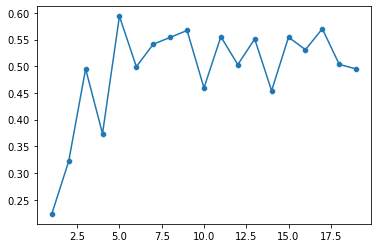

In [20]:
sns.lineplot(
    x=range(1, 20, 1),
    y=coherence_values
)
sns.scatterplot(
    x=range(1, 20, 1),
    y=coherence_values
)

<AxesSubplot:>

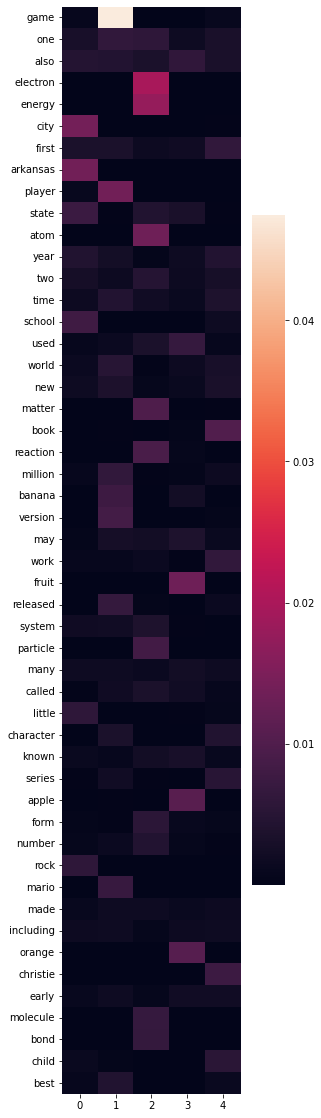

In [21]:
# Topic-term matrix as heatmap
most_common_words = [k for k, v in sorted(dic.cfs.items(), key=lambda x: x[1], reverse=True)[:50]]
words = [dic[k] for k in most_common_words]
#words_alphabetical_index = np.argsort(words)
#words_alphabetical = [words[i] for i in words_alphabetical_index]

plt.figure(figsize=(4, 20))
sns.heatmap(
    lda.get_topics()[:, most_common_words].transpose(),
    yticklabels=words
)

# Quite a few words are shared between topics, let's remove any word that received a notable score in both topics

In [22]:
def get_common_words_over_threshold(dic, lda, threshold):
    words_and_scores = lda.get_topics()
    words_to_exclude = np.where(np.sum(words_and_scores > threshold, axis=0) == lda.num_topics)[0]
    
    return [dic[i] for i in words_to_exclude]

In [23]:
# Exclude over 0.0025
get_common_words_over_threshold(dic, lda, 0.0025)

['also']

In [24]:
# Exclude over 0.001
get_common_words_over_threshold(dic, lda, 0.001)

['also', 'first', 'made', 'many', 'one', 'time', 'two']

In [25]:
# Let's go with 0.001
words_to_exclude_001 = get_common_words_over_threshold(dic, lda, 0.001)

# Recreate objects

# Remove words from docs
docs_filtered = [
    [w for w in doc if w not in words_to_exclude_001]
    for doc in docs
]

# Create dictionary
dic_filtered = corpora.Dictionary(docs_filtered)

# Create bow matrix
bow_filtered = [dic_filtered.doc2bow(doc) for doc in docs_filtered]

# Inspect
bow_filtered

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 2),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 3),
  (25, 1),
  (26, 3),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 3),
  (32, 1),
  (33, 2),
  (34, 4),
  (35, 2),
  (36, 3),
  (37, 2),
  (38, 2),
  (39, 1),
  (40, 2),
  (41, 14),
  (42, 6),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 5),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 3),
  (52, 1),
  (53, 1),
  (54, 5),
  (55, 1),
  (56, 3),
  (57, 1),
  (58, 1),
  (59, 5),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 2),
  (66, 2),
  (67, 3),
  (68, 1),
  (69, 1),
  (70, 5),
  (71, 1),
  (72, 1),
  (73, 5),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 163),
  (86, 60),
  (87, 3),
  (88, 1),
  (89, 1),
  (90, 3),
  (91

In [26]:
# Can take a little while to run
model_list, coherence_values = compute_coherence_values(
    dictionary=dic_filtered,
    corpus=bow_filtered,
    texts=docs_filtered,
    start=1,
    limit=20,
    step=1
)

2022-04-24 19:35:04.013602 1 topics
2022-04-24 19:35:23.641308 2 topics
2022-04-24 19:35:54.903531 3 topics
2022-04-24 19:36:26.554761 4 topics
2022-04-24 19:36:58.522287 5 topics
2022-04-24 19:37:31.325623 6 topics
2022-04-24 19:38:04.518126 7 topics
2022-04-24 19:38:38.588769 8 topics
2022-04-24 19:39:11.987192 9 topics
2022-04-24 19:39:49.980482 10 topics
2022-04-24 19:40:25.625887 11 topics
2022-04-24 19:41:02.139476 12 topics
2022-04-24 19:41:38.264777 13 topics
2022-04-24 19:42:16.083379 14 topics
2022-04-24 19:42:51.874851 15 topics
2022-04-24 19:43:29.938238 16 topics
2022-04-24 19:44:06.575273 17 topics
2022-04-24 19:44:46.184805 18 topics
2022-04-24 19:45:26.166610 19 topics


<AxesSubplot:>

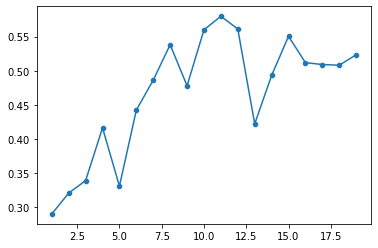

In [27]:
sns.lineplot(
    x=range(1, 20, 1),
    y=coherence_values
)
sns.scatterplot(
    x=range(1, 20, 1),
    y=coherence_values
)

In [28]:
# Train model, starting with 8 topics
lda_filtered = gensim.models.ldamodel.LdaModel(
    bow_filtered,
    num_topics=8,
    id2word = dic_filtered,
    passes=100,
    random_state=666
)

In [29]:
# For each article, print out the top 5 words for each likely topic
for i, k in enumerate(articles.keys()):
    print(k)
    
    doc_topics = lda_filtered.get_document_topics(bow_filtered[i], minimum_probability=0.05)
    # Sort topics by probability
    doc_topics.sort(key=lambda x: x[1], reverse=True)
    
    for d in doc_topics:
        prob = d[1]
        terms = lda_filtered.get_topic_terms(d[0], 5)
        l = []
        for t in terms:
            l.append(dic_filtered[t[0]])
        
        print(f'{prob:.2f}:', ', '.join(l))
        
    print()

atom
1.00: electron, energy, atom, matter, reaction

matter
1.00: electron, energy, atom, matter, reaction

electron
1.00: electron, energy, atom, matter, reaction

molecule
0.93: electron, energy, atom, matter, reaction
0.07: arkansas, city, school, little, rock

phase (matter)
0.77: electron, energy, atom, matter, reaction
0.22: fruit, apple, banana, orange, peach

chemical bond
1.00: electron, energy, atom, matter, reaction

ion
0.86: electron, energy, atom, matter, reaction
0.14: fruit, apple, banana, orange, peach

base (chemistry)
0.77: electron, energy, atom, matter, reaction
0.23: game, player, minecraft, fayetteville, version

chemical reaction
1.00: electron, energy, atom, matter, reaction

energy
1.00: electron, energy, atom, matter, reaction

William Shakespeare
1.00: arkansas, city, school, little, rock

Agatha Christie
1.00: christie, novel, book, bentonville, work

Barbara Cartland
1.00: christie, novel, book, bentonville, work

Danielle Steel
1.00: simenon, maigret, dir

<AxesSubplot:>

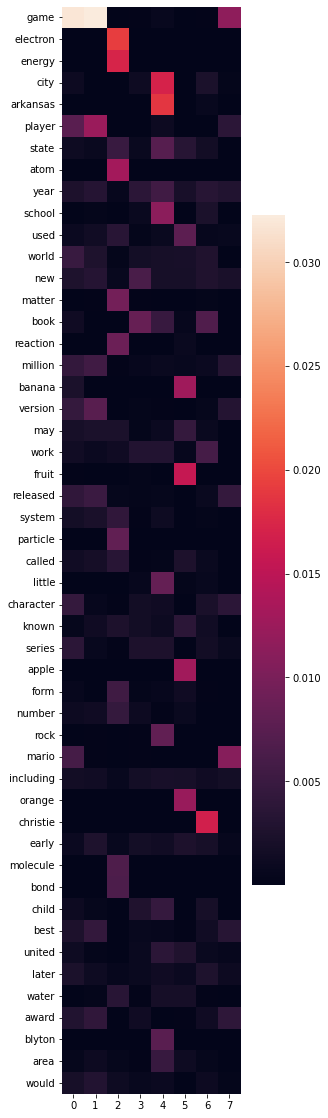

In [30]:
# Topic-term matrix as heatmap
most_common_words = [k for k, v in sorted(dic_filtered.cfs.items(), key=lambda x: x[1], reverse=True)[:50]]
words = [dic_filtered[k] for k in most_common_words]
#words_alphabetical_index = np.argsort(words)
#words_alphabetical = [words[i] for i in words_alphabetical_index]

plt.figure(figsize=(4, 20))
sns.heatmap(
    lda_filtered.get_topics()[:, most_common_words].transpose(),
    yticklabels=words
)

In [31]:
# Train model, 11 topics
lda_filtered = gensim.models.ldamodel.LdaModel(
    bow_filtered,
    num_topics=11,
    id2word = dic_filtered,
    passes=100,
    random_state=666
)

In [32]:
# For each article, print out the top 5 words for each likely topic
for i, k in enumerate(articles.keys()):
    print(k)
    
    doc_topics = lda_filtered.get_document_topics(bow_filtered[i], minimum_probability=0.05)
    # Sort topics by probability
    doc_topics.sort(key=lambda x: x[1], reverse=True)
    
    for d in doc_topics:
        prob = d[1]
        terms = lda_filtered.get_topic_terms(d[0], 5)
        l = []
        for t in terms:
            l.append(dic_filtered[t[0]])
        
        print(f'{prob:.2f}:', ', '.join(l))
        
    print()

atom
1.00: electron, atom, reaction, matter, particle

matter
1.00: electron, atom, reaction, matter, particle

electron
1.00: electron, atom, reaction, matter, particle

molecule
0.85: electron, atom, reaction, matter, particle
0.15: blyton, book, base, child, series

phase (matter)
1.00: ion, phase, lemon, liquid, water

chemical bond
0.86: electron, atom, reaction, matter, particle
0.14: blyton, book, base, child, series

ion
0.68: ion, phase, lemon, liquid, water
0.32: electron, atom, reaction, matter, particle

base (chemistry)
0.54: blyton, book, base, child, series
0.46: electron, atom, reaction, matter, particle

chemical reaction
1.00: electron, atom, reaction, matter, particle

energy
0.74: energy, shakespeare, system, work, play
0.26: electron, atom, reaction, matter, particle

William Shakespeare
1.00: energy, shakespeare, system, work, play

Agatha Christie
1.00: christie, book, novel, work, story

Barbara Cartland
0.46: banana, fruit, orange, apple, peach
0.37: christie, 

<AxesSubplot:>

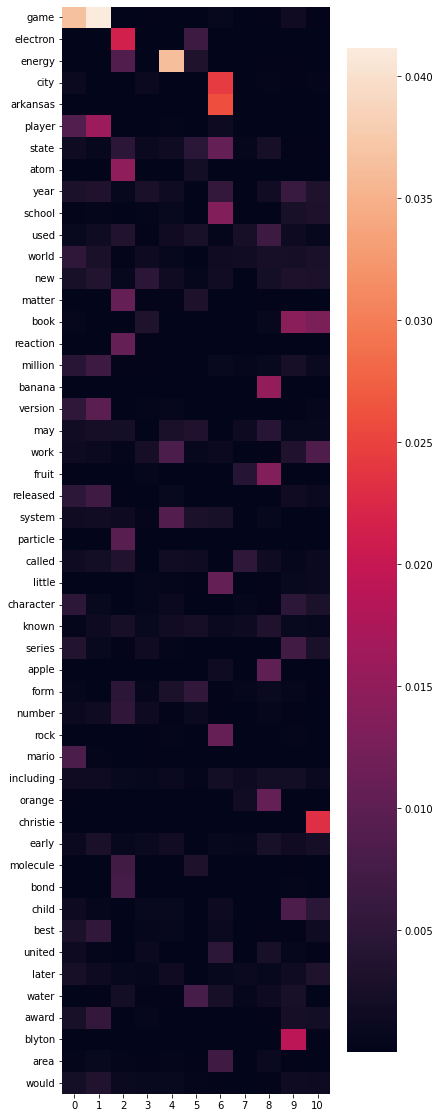

In [33]:
# Topic-term matrix as heatmap
most_common_words = [k for k, v in sorted(dic_filtered.cfs.items(), key=lambda x: x[1], reverse=True)[:50]]
words = [dic_filtered[k] for k in most_common_words]
#words_alphabetical_index = np.argsort(words)
#words_alphabetical = [words[i] for i in words_alphabetical_index]

plt.figure(figsize=(6, 20))
sns.heatmap(
    lda_filtered.get_topics()[:, most_common_words].transpose(),
    yticklabels=words
)